In [1]:
from google.colab import files
uploaded = files.upload()


Saving carbon_emissions.csv to carbon_emissions.csv


In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
import pandas as pd

df = pd.read_csv('carbon_emissions.csv')

df['emissions_per_capita'] = df['emissions'] / df['population']

df['emission_rank'] = df['emissions'].rank(ascending=False).astype(int)

average_emission = df['emissions'].mean()
df['above_average_emission'] = df['emissions'] > average_emission

industry_avg = df.groupby('industry')['emissions'].mean().reset_index()
industry_avg.columns = ['industry', 'avg_emissions_by_industry']

df = pd.merge(df, industry_avg, on='industry', how='left')

df.to_csv('updated_carbon_emissions.csv', index=False)


In [14]:
df = pd.read_csv('carbon_emissions.csv')
df.head()


,country,industry,year,emissions,gdp,population
0,USA,Energy,2020,5000,21000,331
1,China,Energy,2020,8000,15000,1441
2,India,Transport,2020,2000,2800,1393
3,Germany,Manufacturing,2020,1500,4000,83
4,Brazil,Agriculture,2020,1000,1800,213


In [15]:
conn = sqlite3.connect("emissions.db")
df.to_sql("emissions", conn, if_exists="replace", index=False)


10

In [16]:
query1 = """
SELECT industry, SUM(emissions) AS total_emissions
FROM emissions
GROUP BY industry
ORDER BY total_emissions DESC
LIMIT 5;
"""
top_industries = pd.read_sql_query(query1, conn)
print(top_industries)


        industry  total_emissions
0         Energy            15100
1  Manufacturing             9700
2      Transport             8300
3    Agriculture             2600


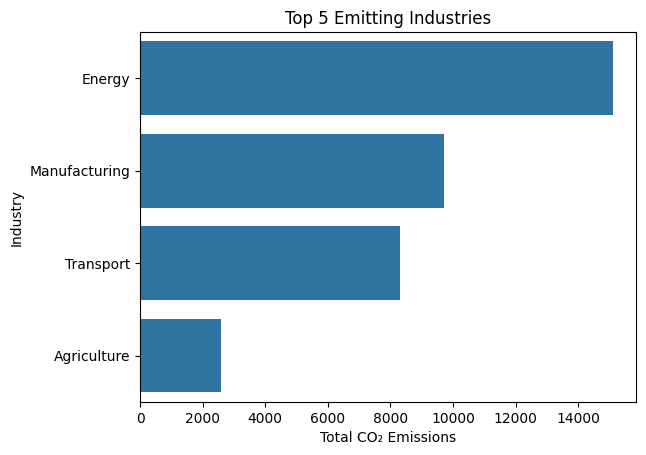

In [17]:
sns.barplot(data=top_industries, x="total_emissions", y="industry")
plt.title("Top 5 Emitting Industries")
plt.xlabel("Total CO₂ Emissions")
plt.ylabel("Industry")
plt.show()


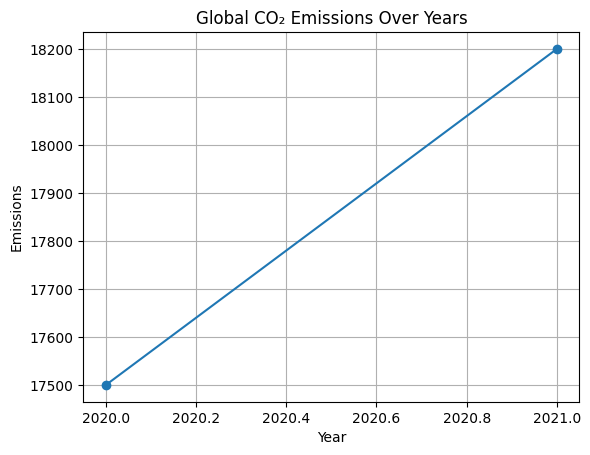

In [18]:
query2 = """
SELECT year, SUM(emissions) AS total_emissions
FROM emissions
GROUP BY year
ORDER BY year;
"""
emissions_trend = pd.read_sql_query(query2, conn)

plt.plot(emissions_trend['year'], emissions_trend['total_emissions'], marker='o')
plt.title("Global CO₂ Emissions Over Years")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.grid(True)
plt.show()


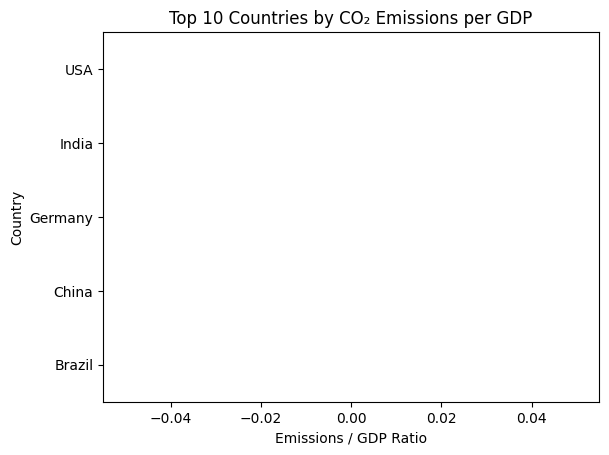

In [19]:
query3 = """
SELECT country, ROUND(SUM(emissions) / SUM(gdp), 5) AS emissions_per_gdp
FROM emissions
GROUP BY country
ORDER BY emissions_per_gdp DESC
LIMIT 10;
"""
efficiency = pd.read_sql_query(query3, conn)
sns.barplot(data=efficiency, y='country', x='emissions_per_gdp')
plt.title("Top 10 Countries by CO₂ Emissions per GDP")
plt.xlabel("Emissions / GDP Ratio")
plt.ylabel("Country")
plt.show()


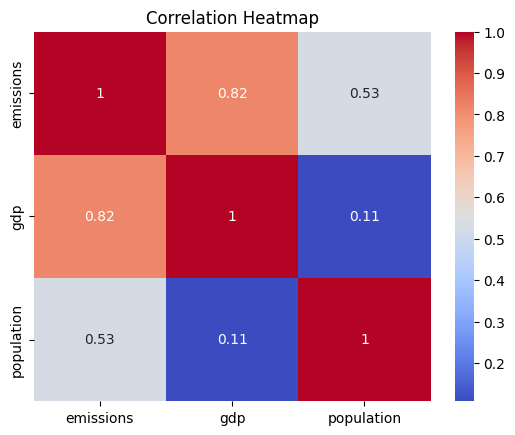

In [20]:
corr = df[['emissions', 'gdp', 'population']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


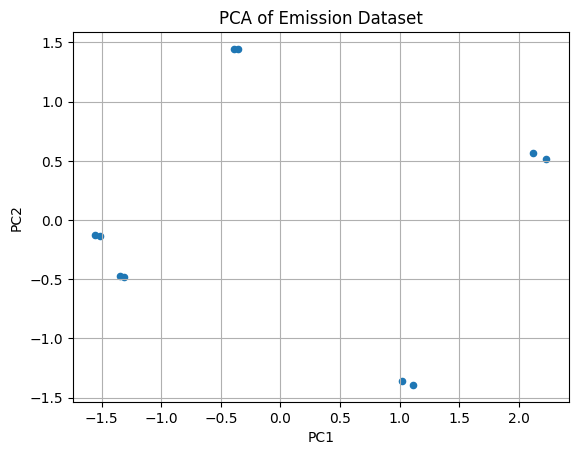

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['emissions', 'gdp', 'population']
x = StandardScaler().fit_transform(df[features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df.plot(kind='scatter', x='PC1', y='PC2', title='PCA of Emission Dataset')
plt.grid(True)
plt.show()
